# 1. 라이브러리 및 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("/content/drive/MyDrive/G_ML_2/data/wine.csv",sep=',')

In [5]:
X=data[data.columns[0:11]]

In [6]:
y=data[['quality']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.7, random_state=42)

# 2. Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid={'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}

In [11]:
from sklearn.linear_model import Ridge

In [12]:
grid_search=GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0]},
             return_train_score=True)

In [14]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'alpha': 1.0}


In [15]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.336


In [16]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.347


In [17]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [18]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011928,0.009858,0.005235,0.000524,0.0001,{'alpha': 0.0001},0.364618,0.202111,0.349531,0.306502,0.452615,0.335075,0.081723,6,0.356019,0.394011,0.361156,0.368514,0.338663,0.363672,0.018079
1,0.006895,0.001278,0.004724,0.000353,0.001,{'alpha': 0.001},0.365314,0.201863,0.349988,0.306716,0.452469,0.335270,0.081814,5,0.355798,0.393976,0.360987,0.368512,0.338603,0.363575,0.018107
2,0.005964,0.000349,0.005010,0.000714,0.01,{'alpha': 0.01},0.365595,0.201852,0.350163,0.306740,0.452448,0.335360,0.081837,4,0.355552,0.393936,0.360792,0.368509,0.338533,0.363465,0.018140
3,0.006554,0.001103,0.006297,0.003168,0.1,{'alpha': 0.1},0.365568,0.203327,0.350128,0.305799,0.453378,0.335640,0.081689,3,0.355474,0.393880,0.360725,0.368497,0.338479,0.363411,0.018144
4,0.006308,0.000754,0.006001,0.001992,0.5,{'alpha': 0.5},0.364967,0.207929,0.349594,0.302550,0.456078,0.336223,0.081196,2,0.354971,0.393162,0.360254,0.368301,0.337842,0.362906,0.018126
5,0.005846,0.000092,0.004968,0.000753,1,{'alpha': 1.0},0.364011,0.211324,0.348831,0.299882,0.457632,0.336336,0.080736,1,0.354122,0.391962,0.359464,0.367923,0.336750,0.362044,0.018104
6,0.006157,0.000323,0.005356,0.001234,5,{'alpha': 5.0},0.356832,0.221131,0.344753,0.291545,0.456565,0.334165,0.077719,7,0.348255,0.384550,0.353895,0.364110,0.329932,0.356148,0.018026
7,0.006773,0.001362,0.004736,0.000060,10,{'alpha': 10.0},0.348643,0.225485,0.340595,0.286221,0.451210,0.330431,0.074821,8,0.342436,0.377772,0.348068,0.359139,0.323965,0.350276,0.017850


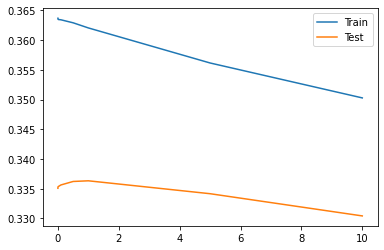

In [31]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_alpha'],  result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_alpha'],  result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
from scipy.stats import randint

In [22]:
param_distribs = {'alpha': randint(low=0.0001, high=100)}

In [23]:
random_search=RandomizedSearchCV(Ridge(), param_distributions=param_distribs, cv=5,  n_iter=1000, return_train_score=True)

In [24]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f30351a9a10>},
                   return_train_score=True)

In [25]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'alpha': 1}


In [26]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.336


In [27]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.347


In [28]:
result_random= pd.DataFrame(random_search.cv_results_ )

In [29]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009559,0.006340,0.006188,0.002662,21,{'alpha': 21},0.333775,0.228731,0.332538,0.277107,0.440326,0.322496,0.070660,211,0.332618,0.366008,0.337686,0.349560,0.313946,0.339964,0.017358
1,0.006475,0.000519,0.004846,0.000173,38,{'alpha': 38},0.317402,0.229141,0.322994,0.266132,0.427348,0.312603,0.066967,367,0.322014,0.352603,0.325903,0.338289,0.302683,0.328298,0.016685
2,0.006469,0.000419,0.005634,0.000292,7,{'alpha': 7},0.353457,0.223311,0.343056,0.289225,0.454480,0.332706,0.076452,72,0.345789,0.381672,0.351461,0.362096,0.327369,0.353677,0.017966
3,0.006334,0.000524,0.005119,0.000408,46,{'alpha': 46},0.311540,0.228802,0.319456,0.261902,0.422404,0.308821,0.065766,456,0.318187,0.347621,0.321542,0.334080,0.298505,0.323987,0.016428
4,0.006003,0.000268,0.004783,0.000075,30,{'alpha': 30},0.324319,0.229251,0.327097,0.270919,0.432969,0.316911,0.068451,297,0.326501,0.358354,0.330949,0.343141,0.307509,0.333291,0.016979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.005929,0.000430,0.004724,0.000181,95,{'alpha': 95},0.288551,0.226224,0.305312,0.243804,0.400951,0.292968,0.061162,948,0.302762,0.327123,0.303589,0.316779,0.281284,0.306307,0.015421
996,0.006334,0.000852,0.004625,0.000045,25,{'alpha': 25},0.329319,0.229087,0.330001,0.274240,0.436904,0.319910,0.069588,246,0.329735,0.362429,0.334532,0.346567,0.310933,0.336839,0.017184
997,0.006470,0.001485,0.004584,0.000045,90,{'alpha': 90},0.290255,0.226448,0.306366,0.245227,0.402680,0.294195,0.061515,894,0.303937,0.328693,0.304970,0.318103,0.282606,0.307662,0.015494
998,0.005706,0.000089,0.004545,0.000025,66,{'alpha': 66},0.300115,0.227686,0.312456,0.253205,0.412209,0.301134,0.063496,661,0.310622,0.337621,0.312797,0.325634,0.290113,0.315357,0.015922


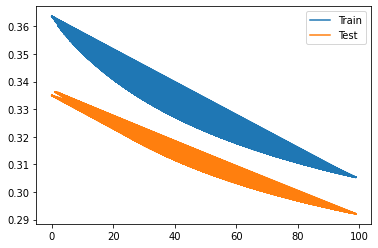

In [32]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_alpha'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_alpha'], result_random['mean_test_score'], label="Test")
plt.legend()